In [1]:
import pandas as pd

In [2]:
# thực hiện tiếp các nhiệm vụ sau:
# 
#  lựa chọn đặc trưng 1-gram, 2-gram
# convert sang vector với trọng số ở các mode: binary, count, tfidf 
# chia thành tập Train và Test 
# xây dựng các mô hình học: NB, SVM, Neural Network 
# chọn mô hình tốt nhất và viết hàm dự đoán sentiment của một câu đưa vào

In [3]:
filename = 'sentimentVN.csv'
df = pd.read_csv(filename)
print("df.head(5):\n",df.head(5))
print("df.shape: ",df.shape)
print("df.columns: ",df.columns)

df.head(5):
    Unnamed: 0                                       comment label
0           0                         áo bao đẹp ạ positive   POS
1           1                            tuyệt vời positive   POS
2           2                     2day ao không giong trong   NEG
3           3  mùi thơm bôi lên da mềm da nagative positive   POS
4           4                      vải đẹp dày dặn positive   POS
df.shape:  (31460, 3)
df.columns:  Index(['Unnamed: 0', 'comment', 'label'], dtype='object')


In [4]:
from collections import Counter 
counter = Counter()
labels = df['label']
reviews = df.values[:,1] 
counter.update(labels)
print(counter)
print(reviews[:10])

Counter({'POS': 20093, 'NEG': 6669, 'NEU': 4698})
['áo bao đẹp ạ positive' 'tuyệt vời positive' '2day ao không giong trong'
 'mùi thơm bôi lên da mềm da nagative positive' 'vải đẹp dày dặn positive'
 'hàng rất đẹp rất chi là ưng ý positive positive'
 'chất lượng sản phẩm tốt hạn sử dụng dài positive positive'
 'ăn nói và thái độ phục vụ tốt positive'
 'đóng gói sản phẩm chắc chắn positive'
 'tất sờn hết ca chưa dùng mà vay r']


<BarContainer object of 3 artists>

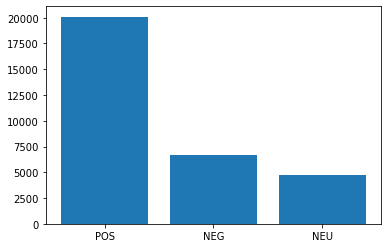

In [5]:
import matplotlib.pyplot as plt
plt.bar(counter.keys(),counter.values())

In [7]:
data =df.values
#print(data[:2])
lines = data[:,1]
labels = data[:,2]
print(lines[20:])
print(labels[:10])

['khi mua về nên đi sửa lại'
 'với giá này thì sản phẩm tạm ổn notpos  gọi là đẹp lắm positive positive'
 'rất đáng tiền thời gian giao hàng rất nhanh chất lượng sản phẩm tuyệt vời positive positive'
 ... 'hàng đẹp đúng giá tiền positive positive' 'chất vải khá ổn positive'
 'áo rất ok nhé vải mịn len cao cổ này phối form mùa đông thì quá chất m ng nhé positive positive']
['POS' 'POS' 'NEG' 'POS' 'POS' 'POS' 'POS' 'POS' 'POS' 'NEG']


In [8]:
import nltk
#nltk.download('all')
from nltk.util import ngrams
# tách từ trong từng câu
#1-gram
sentences = [nltk.word_tokenize(str(sent)) for sent in lines]
print(sentences[:5])

print("++++++++++++++++++++++++++++++++++++")

#2-gram
sentences2 = []
for i in range(len(sentences)):
    bigrams = ngrams(sentences[i],2)
    join_grams = [' '.join(list(gram)) for gram in bigrams]
    sentences2.append(join_grams)
print(sentences2[:5])


[['áo', 'bao', 'đẹp', 'ạ', 'positive'], ['tuyệt', 'vời', 'positive'], ['2day', 'ao', 'không', 'giong', 'trong'], ['mùi', 'thơm', 'bôi', 'lên', 'da', 'mềm', 'da', 'nagative', 'positive'], ['vải', 'đẹp', 'dày', 'dặn', 'positive']]
++++++++++++++++++++++++++++++++++++
[['áo bao', 'bao đẹp', 'đẹp ạ', 'ạ positive'], ['tuyệt vời', 'vời positive'], ['2day ao', 'ao không', 'không giong', 'giong trong'], ['mùi thơm', 'thơm bôi', 'bôi lên', 'lên da', 'da mềm', 'mềm da', 'da nagative', 'nagative positive'], ['vải đẹp', 'đẹp dày', 'dày dặn', 'dặn positive']]


In [9]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

# matrix (convert sang vector với binary)
X = tokenizer.texts_to_matrix(sentences, mode='binary')
# matrix (convert sang vector với count)
#X = tokenizer.texts_to_matrix(sentences, mode='count')
# matrix (convert sang vector với tfidf)
#X = tokenizer.texts_to_matrix(sentences, mode='tfidf')

# matrix (convert sang vector với binary)
#X2 = tokenizer.texts_to_matrix(sentences2, mode='count')
# matrix (convert sang vector với count)
#X = tokenizer.texts_to_matrix(sentences, mode='count')
# matrix (convert sang vector với tfidf)
#X = tokenizer.texts_to_matrix(sentences, mode='tfidf')

print(X)
print("++++++++++++++++++++++++++++++")
#print(X2)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
++++++++++++++++++++++++++++++


In [10]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=0)

In [11]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR = model_LR.fit(x_train, y_train)
from sklearn.metrics import classification_report
y_pred = model_LR.predict(X_test)
print(classification_report(y_test,y_pred))

# kết quả sẽ cho ra warning nhưng vẫn chạy được

C:\Users\TuanDuy\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         NEG       0.70      0.76      0.73      1290
         NEU       0.43      0.23      0.30       946
         POS       0.86      0.93      0.90      4056

    accuracy                           0.79      6292
   macro avg       0.66      0.64      0.64      6292
weighted avg       0.76      0.79      0.77      6292



In [12]:
# LogisticRegression
#input_sent = 'hàng rất chất lượng và nhìn rất đẹp'
input_sent = 'khi mua về nên đi sửa lại'

#X_input = tokenizer.texts_to_matrix(input_sentences, mode='count')

# Step 1: tokenize
input_sentences = []
input_sentences.append(nltk.word_tokenize(input_sent))

print(input_sentences)

#input_sentences = [nltk.word_tokenize(input_sent)]
#print(input_sentences)


# Step 2: chuyển list of tokens -> vector of number

# texts_to_matrix
# tokenizer.texts_to_matrix(input_sentences, mode='binary')
#print(X_input)
X_input = tokenizer.texts_to_matrix(input_sentences, mode='binary')
print(X_input)
y_pred = model_LR.predict(X_input)
print(y_pred)

[['khi', 'mua', 'về', 'nên', 'đi', 'sửa', 'lại']]
[[0. 0. 0. ... 0. 0. 0.]]
['NEG']


In [15]:
# naive_bayes chạy nhanh nhất
from sklearn.naive_bayes import MultinomialNB

model_LR = MultinomialNB()
model_LR = model_LR.fit(x_train, y_train)

from sklearn.metrics import classification_report
y_pred = model_LR.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         NEG       0.65      0.74      0.69      1290
         NEU       0.35      0.31      0.33       946
         POS       0.87      0.86      0.87      4056

    accuracy                           0.75      6292
   macro avg       0.62      0.64      0.63      6292
weighted avg       0.75      0.75      0.75      6292



In [16]:
# naive_bayes
input_sent = 'thầy Cường đẹp trai'
#input_sent = 'khi mua về nên đi sửa lại'
# Step 1: tokenize
input_sentences = []
input_sentences.append(nltk.word_tokenize(input_sent))
print(input_sentences)
# Step 2: chuyển list of tokens -> vector of number
X_input = tokenizer.texts_to_matrix(input_sentences, mode='binary')
print(X_input)
y_pred = model_LR.predict(X_input)
print(y_pred)

[['thầy', 'Cường', 'đẹp', 'trai']]
[[0. 0. 0. ... 0. 0. 0.]]
['POS']


In [ ]:
# Đợi lâu
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Hello world")

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))